# Analyse des données pour Innova Electronic

In [1]:
# importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# chargement du Dataframe
df = pd.read_csv('vente.csv')
df.head()

,Month,Product,Units Sold,Revenue
0,January,Smartphone,1000,50000
1,January,Laptop,500,100000
2,January,Tablet,300,45000
3,January,Smart TV,200,25000
4,January,Headphones,800,32000


## Examinez la structure et le contenu du DataFrame:

In [3]:
# Affiche les informations sur les colonnes et les types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       588 non-null    object
 1   Product     588 non-null    object
 2   Units Sold  588 non-null    int64 
 3   Revenue     588 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 18.5+ KB


In [4]:
# Affiche les statistiques descriptives pour les variables numériques
df.describe()

,Units Sold,Revenue
count,588.000000,588.000000
mean,489.673469,31221.428571
std,343.815948,27426.671012
min,100.000000,3000.000000
25%,255.000000,12400.000000
50%,382.500000,24000.000000
75%,600.000000,41337.500000
max,2100.000000,210000.000000


##  Vérification des données manquantes et des valeurs aberrantes:

In [5]:
# le nombre de valeurs manquantes par colonne
df.isnull().sum()

Month         0
Product       0
Units Sold    0
Revenue       0
dtype: int64

## Calcul des ventes totales par mois:

In [6]:
#Regroupez les données par mois et calculez la somme des ventes ("Unit sold"):
ventes_par_mois = df.groupby('Month')[['Units Sold']].sum().sort_values(['Units Sold'])
ventes_par_mois


,Units Sold
Month,
January,15480
February,17028
March,18576
April,20124
May,21672
June,23220
July,24768
August,26316
September,27864


## Identification des 5 produits les plus vendus par mois:

In [7]:
produits_plus_vendus = df.groupby('Product')['Units Sold'].sum().nlargest(5)
produits_plus_vendus 

Product
Smartphone    18600
Headphones    14880
Power Bank    14880
Monitor       13020
USB Cable     13020
Name: Units Sold, dtype: int64

##  Mois avec les ventes les plus élevées et les plus basses:

In [8]:
# recupération des ventes maximale et minimale
mois_max_ventes = ventes_par_mois.idxmax()
mois_min_ventes = ventes_par_mois.idxmin()

# recupération des mois ayants la vente maximale et minimale
ventes_max = ventes_par_mois.loc[mois_max_ventes]
ventes_min = ventes_par_mois.loc[mois_min_ventes]
print("les mois avec le plus de ventes : \n",ventes_max )

print(" les mois avec le moins de ventes :\n",ventes_min)


les mois avec le plus de ventes : 
           Units Sold
Month               
December       32508
 les mois avec le moins de ventes :
          Units Sold
Month              
January       15480


## Visualisation avec Matplotlib

### Graphique linéaire pour les ventes mensuelles

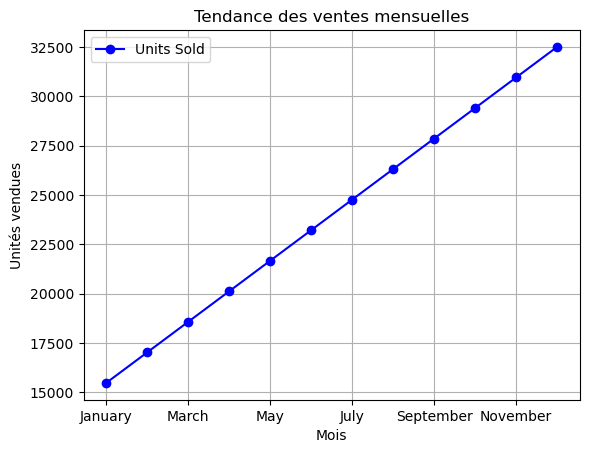

In [9]:

ventes_par_mois.plot( marker='o', color='b')
plt.title('Tendance des ventes mensuelles')
plt.xlabel('Mois')
plt.ylabel('Unités vendues')
plt.grid(True)
plt.show()

### Graphique en bar pour les ventes mensuelles


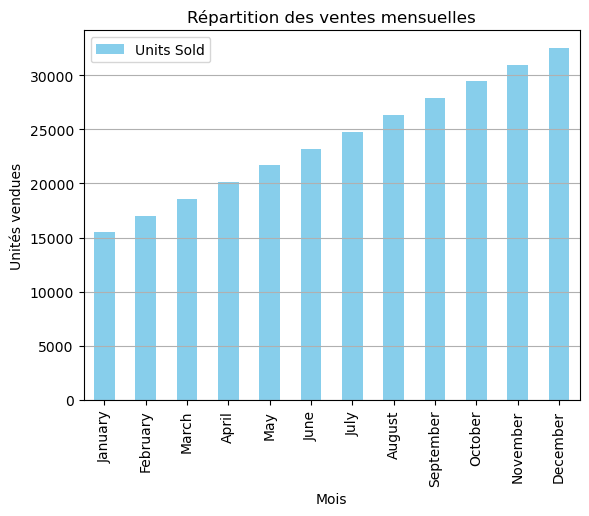

In [10]:
ventes_par_mois.plot(kind='bar', color='skyblue')
plt.title('Répartition des ventes mensuelles')
plt.xlabel('Mois')
plt.ylabel('Unités vendues')
plt.grid(axis='y')
plt.show()

### Top 10 des produits par ventes unitaires

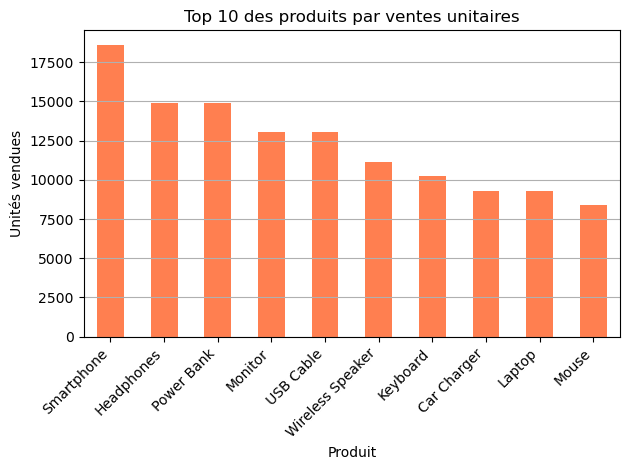

In [11]:
produits_plus_vendus = df.groupby('Product')['Units Sold'].sum().nlargest(10)
produits_plus_vendus.plot(kind='bar', color='coral')
plt.title('Top 10 des produits par ventes unitaires')
plt.xlabel('Produit')
plt.ylabel('Unités vendues')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



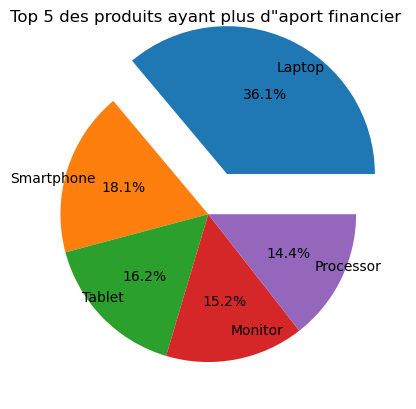

In [20]:
produits_plus_ventable = df.groupby('Product')['Revenue'].sum().nlargest(5)
#produits_plus_ventable
#Identification du produit avec le revenu le plus élevé
produit_meilleur_revenu = produits_plus_ventable.idxmax()

# Extraction des produits et des revenu
noms_produits = produits_plus_ventable.index.tolist()
revenu_total = produits_plus_ventable.tolist()

# Définition des valeurs d'éclatement 
valeurs_eclatement = [0.3 if produit == produit_meilleur_revenu else 0 for produit in noms_produits]
# Création du diagramme circulaire éclaté
plt.pie(
    revenu_total,
    labels=noms_produits,
    autopct='%1.1f%%',
    labeldistance=0.8,
    explode=valeurs_eclatement,
)


plt.title('Top 5 des produits ayant plus d"aport financier ')

plt.show()

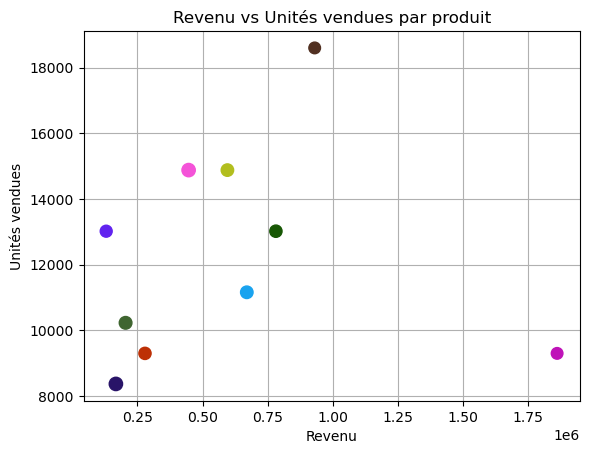

In [12]:
revenu_par_produit = df.groupby('Product')[['Revenue','Units Sold']].sum().nlargest(10,'Units Sold')
X = revenu_par_produit[ ['Revenue']]
couleurs = np.random.rand(10,3)
tailles = np.random.randint(70, 100, 10)

plt.scatter(X, produits_plus_vendus, c =couleurs, s = tailles)
plt.title('Revenu vs Unités vendues par produit')
plt.xlabel('Revenu')
plt.ylabel('Unités vendues')
plt.grid(True)

plt.show()